In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statistics
from scipy.stats import shapiro

In [2]:
data=pd.read_csv(r"C:\Users\aniru\OneDrive\Desktop\MVPA\Unmesh Patnaik\Group assignment\Housing.csv")

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
data['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [8]:
data['mainroad'].unique()

array(['yes', 'no'], dtype=object)

In [9]:
data['guestroom'].unique()

array(['no', 'yes'], dtype=object)

In [10]:
data['basement'].unique()

array(['no', 'yes'], dtype=object)

In [11]:
data['hotwaterheating'].unique()

array(['no', 'yes'], dtype=object)

In [12]:
data['airconditioning'].unique()

array(['yes', 'no'], dtype=object)

In [13]:
data['parking'].unique()

array([2, 3, 0, 1], dtype=int64)

(array([ 61., 163., 139.,  89.,  46.,  25.,  13.,   4.,   1.,   4.]),
 array([ 1750000.,  2905000.,  4060000.,  5215000.,  6370000.,  7525000.,
         8680000.,  9835000., 10990000., 12145000., 13300000.]),
 <BarContainer object of 10 artists>)

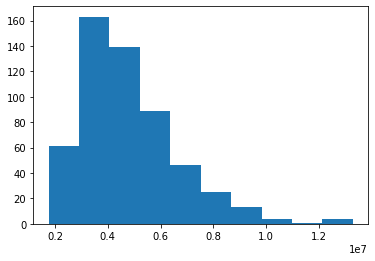

In [14]:
plt.hist(data['price'])

Here, we have seen that the data for the pricing for the house is not normalised. So for doing any analysis on the pricing of the houses we need to normalize the data first. 

In [15]:
log_price=np.log(data['price'])

(array([ 13.,  26.,  61., 114., 112.,  93.,  68.,  39.,  14.,   5.]),
 array([14.37512635, 14.57794117, 14.780756  , 14.98357082, 15.18638564,
        15.38920047, 15.59201529, 15.79483012, 15.99764494, 16.20045977,
        16.40327459]),
 <BarContainer object of 10 artists>)

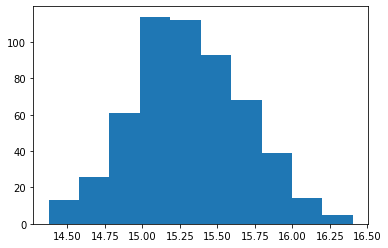

In [16]:
plt.hist(log_price)

<AxesSubplot:xlabel='price', ylabel='Density'>

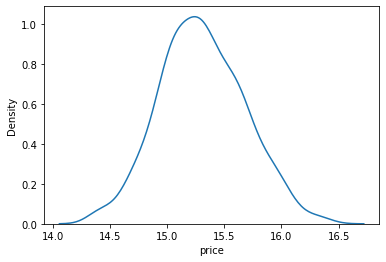

In [17]:
sns.kdeplot(x=log_price)

In [18]:
stat, p = shapiro(log_price)
print('Test statistic:', stat)
print('P-value:', p)
if p > 0.05:
 print('The data is normally distributed')
else:
 print('The data is not normally distributed')


Test statistic: 0.9961677193641663
P-value: 0.21173334121704102
The data is normally distributed


Here after taking the log of the pricing of the house we can see that the data has been normalised to almost a great extent. This can be seen from the various grtaphs like kdeplot and the shapiro test which are used to see the normalization of the data

In [19]:
y=log_price
x=data['area']

In [20]:
x = sm.add_constant(x)
model1 = sm.OLS(y, x).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     227.3
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           3.66e-43
Time:                        01:00:40   Log-Likelihood:                -138.84
No. Observations:                 545   AIC:                             281.7
Df Residuals:                     543   BIC:                             290.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.8272      0.035    429.406      0.000      14.759      14.895
area        9.316e-05   6.18e-06     15.077      0.000     8.1e-05       0.000
==============================================================================
Omnibus:                        0.105   Durbin-Watson:                   0.585
Prob(Omnibus):                  0.949   Jarque-Bera (JB):                0.126
Skew:                          -0.034   Prob(JB):                        0.939
Kurtosis:                       2.967   Cond. No.                     1.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
from scipy.stats import f

# Set the degrees of freedom for the numerator and denominator
dfn = 1 # degrees of freedom for numerator
dfd = 543 # degrees of freedom for denominator
alpha = 0.05 # significance level

# Calculate the critical value for the F-statistic
f_crit = f.ppf(q=1-alpha, dfn=dfn, dfd=dfd)

print("Critical value of F-statistic: ", f_crit)

Critical value of F-statistic:  3.8586410520336356


<AxesSubplot:xlabel='price'>

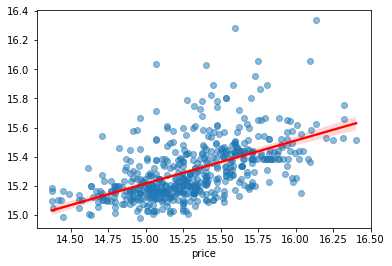

In [59]:
sns.regplot(x=y, y=model1.fittedvalues, scatter_kws={'alpha':0.5}, line_kws ={'color':'red'})

Critical value of F-statistic:  2.388440738539174

here we have run a linear regression between the pricing and the area for the housing data. And from the ols model statistics we can see clearly that eventhough the p values are significant but the reason we can't accept the model because the r square is much more nearer to 0 instead of 1, which means that the model we made is not quite suitable or a better fit for the data.
adjusted is always less than R square. 
r square get influnced by number of variables in the regression model. so we see the adjusted r square.
the range of F-statistics depends on the sample size, the number of independent variables, and the significance level of the test. The F-statistic value must be compared with the critical value to determine whether the model is statistically significant or not.If the calculated F-statistic is greater than the critical value, we can reject the null hypothesis that all regression coefficients are zero and conclude that the model is statistically significant at the specified level of significance.

### here the assumption for the hypothesis is thta : 
##h0:there is no significant relation between area and price of the house 
h1: there is relationship between the two variables 
here we got p value significant , less than .05, so we are rejecting the null hypothesis


In [23]:
y=log_price
x=data[['area','stories']]

In [24]:
x = sm.add_constant(x)
model2 = sm.OLS(y, x).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     206.7
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           1.91e-67
Time:                        01:00:41   Log-Likelihood:                -79.655
No. Observations:                 545   AIC:                             165.3
Df Residuals:                     542   BIC:                             178.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.5664      0.038    378.844      0.000      14.491      14.642
area         8.78e-05   5.57e-06     15.769      0.000    7.69e-05    9.87e-05
stories        0.1597      0.014     11.466      0.000       0.132       0.187
==============================================================================
Omnibus:                        2.085   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.353   Jarque-Bera (JB):                2.100
Skew:                          -0.000   Prob(JB):                        0.350
Kurtosis:                       3.304   Cond. No.                     1.83e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
from scipy.stats import f

# Set the degrees of freedom for the numerator and denominator
dfn = 2 # degrees of freedom for numerator
dfd = 542 # degrees of freedom for denominator
alpha = 0.05 # significance level

# Calculate the critical value for the F-statistic
f_crit = f.ppf(q=1-alpha, dfn=dfn, dfd=dfd)

print("Critical value of F-statistic: ", f_crit)

Critical value of F-statistic:  3.0123514105410663


assumptions
Linearity: The relationship between the dependent variable and the independent variables is linear. 
This means that as the independent variable(s) change, the change in the dependent variable is proportional and constant.

Independence: The observations in the data set are independent of each other. This means that the value of the dependent 
variable for one observation does not depend on the value of the dependent variable for another observation.

Homoscedasticity: The variance of the errors is constant across all levels of the independent variables. 
This means that the spread of the residuals (the difference between the actual and predicted values) should be similar 
for all values of the independent variables.

Normality: The errors (residuals) are normally distributed. This means that the distribution of the residuals should 
be roughly symmetric around zero and follow a normal distribution.

No multicollinearity: There is no high correlation among the independent variables. This means that the independent 
variables should be independent of each other.

No influential outliers: There are no influential outliers that could skew the results of the regression analysis.


In [25]:
y=log_price
x=data[['area','stories','bedrooms']]

In [26]:
x = sm.add_constant(x)
model3 = sm.OLS(y, x).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     151.6
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           2.69e-71
Time:                        01:00:41   Log-Likelihood:                -67.888
No. Observations:                 545   AIC:                             143.8
Df Residuals:                     541   BIC:                             161.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.3813      0.053    269.230      0.000      14.276      14.486
area        8.433e-05    5.5e-06     15.332      0.000    7.35e-05    9.51e-05
stories        0.1305      0.015      8.755      0.000       0.101       0.160
bedrooms       0.0863      0.018      4.886      0.000       0.052       0.121
==============================================================================
Omnibus:                        4.298   Durbin-Watson:                   0.897
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                4.376
Skew:                          -0.144   Prob(JB):                        0.112
Kurtosis:                       3.332   Cond. No.                     2.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
from scipy.stats import f

# Set the degrees of freedom for the numerator and denominator
dfn = 3 # degrees of freedom for numerator
dfd = 541 # degrees of freedom for denominator
alpha = 0.05 # significance level

# Calculate the critical value for the F-statistic
f_crit = f.ppf(q=1-alpha, dfn=dfn, dfd=dfd)

print("Critical value of F-statistic: ", f_crit)

Critical value of F-statistic:  2.621378690498798


In [28]:
y=log_price
x=data[['area','stories','bedrooms','bathrooms']]

In [29]:
x = sm.add_constant(x)
model4 = sm.OLS(y, x).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     146.7
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           7.96e-85
Time:                        01:00:41   Log-Likelihood:                -33.696
No. Observations:                 545   AIC:                             77.39
Df Residuals:                     540   BIC:                             98.90
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.3049      0.051    280.412      0.000      14.205      14.405
area        7.777e-05   5.23e-06     14.876      0.000    6.75e-05     8.8e-05
stories        0.1057      0.014      7.389      0.000       0.078       0.134
bedrooms       0.0479      0.017      2.786      0.006       0.014       0.082
bathrooms      0.2088      0.025      8.497      0.000       0.161       0.257
==============================================================================
Omnibus:                        4.189   Durbin-Watson:                   0.976
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                4.067
Skew:                          -0.166   Prob(JB):                        0.131
Kurtosis:                       3.263   Cond. No.                     2.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
from scipy.stats import f

# Set the degrees of freedom for the numerator and denominator
dfn = 4 # degrees of freedom for numerator
dfd = 540 # degrees of freedom for denominator
alpha = 0.05 # significance level

# Calculate the critical value for the F-statistic
f_crit = f.ppf(q=1-alpha, dfn=dfn, dfd=dfd)

print("Critical value of F-statistic: ", f_crit)

Critical value of F-statistic:  2.388440738539174


<AxesSubplot:xlabel='price'>

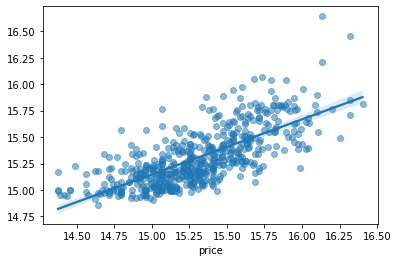

In [52]:
sns.regplot(x=y, y=model4.fittedvalues, scatter_kws={'alpha':0.5})

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
def get_vif_factors(X):
    X_matrix = X.values
    vif = [variance_inflation_factor(X_matrix,i) for i in range(X_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['VIF'] = vif
   
    return vif_factors

In [32]:
get_vif_factors(x)

,column,VIF
0,const,21.210144
1,area,1.047046
2,stories,1.252991
3,bedrooms,1.311029
4,bathrooms,1.240516


In [33]:
data = pd.get_dummies(data, columns = ['mainroad'], drop_first = True)

In [34]:
data = pd.get_dummies(data, columns = ['prefarea'], drop_first = True)

In [35]:
data = pd.get_dummies(data, columns = ['parking'], drop_first = True)

In [36]:
data.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,furnishingstatus,mainroad_yes,prefarea_yes,parking_1,parking_2,parking_3
0,13300000,7420,4,2,3,no,no,no,yes,furnished,1,1,0,1,0
1,12250000,8960,4,4,4,no,no,no,yes,furnished,1,0,0,0,1
2,12250000,9960,3,2,2,no,yes,no,no,semi-furnished,1,1,0,1,0
3,12215000,7500,4,2,2,no,yes,no,yes,furnished,1,1,0,0,1
4,11410000,7420,4,1,2,yes,yes,no,yes,furnished,1,0,0,1,0


In [37]:
y=log_price
x=data[['area','stories','bedrooms','bathrooms','mainroad_yes']]

In [38]:
x = sm.add_constant(x)
model5 = sm.OLS(y, x).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     131.1
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           1.02e-90
Time:                        01:00:42   Log-Likelihood:                -17.314
No. Observations:                 545   AIC:                             46.63
Df Residuals:                     539   BIC:                             72.43
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           14.1770      0.054    261.227      0.000      14.070      14.284
area          6.875e-05   5.31e-06     12.944      0.000    5.83e-05    7.92e-05
stories          0.0944      0.014      6.729      0.000       0.067       0.122
bedrooms         0.0577      0.017      3.435      0.001       0.025       0.091
bathrooms        0.2118      0.024      8.871      0.000       0.165       0.259
mainroad_yes     0.1886      0.033      5.779      0.000       0.125       0.253
==============================================================================
Omnibus:                        6.561   Durbin-Watson:                   1.041
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                6.883
Skew:                          -0.197   Prob(JB):                       0.0320
Kurtosis:                       3.385   Cond. No.                     2.99e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
y=log_price
x=data[['area','stories','bedrooms','bathrooms','mainroad_yes','prefarea_yes']]

In [40]:
x = sm.add_constant(x)
model6 = sm.OLS(y, x).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     124.6
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           2.04e-98
Time:                        01:00:42   Log-Likelihood:                 3.2866
No. Observations:                 545   AIC:                             7.427
Df Residuals:                     538   BIC:                             37.53
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           14.2093      0.053    270.436      0.000      14.106      14.313
area          6.282e-05    5.2e-06     12.081      0.000    5.26e-05     7.3e-05
stories          0.0956      0.014      7.065      0.000       0.069       0.122
bedrooms         0.0523      0.016      3.225      0.001       0.020       0.084
bathrooms        0.2111      0.023      9.174      0.000       0.166       0.256
mainroad_yes     0.1586      0.032      4.988      0.000       0.096       0.221
prefarea_yes     0.1655      0.025      6.500      0.000       0.115       0.216
==============================================================================
Omnibus:                        6.348   Durbin-Watson:                   1.056
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                8.627
Skew:                          -0.064   Prob(JB):                       0.0134
Kurtosis:                       3.603   Cond. No.                     3.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='price'>

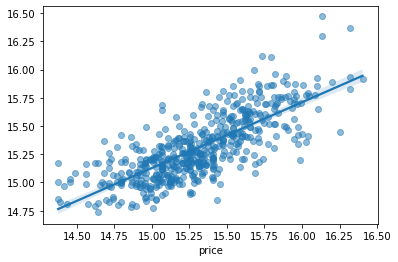

In [51]:
sns.regplot(x=y, y=model6.fittedvalues, scatter_kws={'alpha':0.5})

In [41]:
y=log_price
x=data[['area','stories','bedrooms','bathrooms','mainroad_yes','prefarea_yes','parking_1','parking_2','parking_3']]

In [63]:
x = sm.add_constant(x)
model7 = sm.OLS(y, x).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     102.9
Date:                Sat, 18 Mar 2023   Prob (F-statistic):          3.85e-103
Time:                        01:33:52   Log-Likelihood:                 19.378
No. Observations:                 545   AIC:                            -20.76
Df Residuals:                     536   BIC:                             17.95
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           14.2355      0.052    275.898      0.000      14.134      14.337
area          5.575e-05   5.21e-06     10.704      0.000    4.55e-05     6.6e-05
stories          0.0995      0.013      7.528      0.000       0.074       0.125
bedrooms         0.0470      0.016      2.970      0.003       0.016       0.078
bathrooms        0.1988      0.022      8.840      0.000       0.155       0.243
mainroad_yes     0.1393      0.031      4.463      0.000       0.078       0.201
prefarea_yes     0.1655      0.025      6.679      0.000       0.117       0.214
parking_1        0.0953      0.025      3.749      0.000       0.045       0.145
parking_2        0.1468      0.028      5.256      0.000       0.092       0.202
==============================================================================
Omnibus:                        4.496   Durbin-Watson:                   1.090
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                4.721
Skew:                          -0.136   Prob(JB):                       0.0944
Kurtosis:                       3.366   Cond. No.                     3.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
y=log_price
x=data[['area','stories','bedrooms','bathrooms','mainroad_yes','prefarea_yes','parking_1','parking_2']]

In [64]:
from scipy.stats import f

# Set the degrees of freedom for the numerator and denominator
dfn = 8 # degrees of freedom for numerator
dfd = 536 # degrees of freedom for denominator
alpha = 0.05 # significance level

# Calculate the critical value for the F-statistic
f_crit = f.ppf(q=1-alpha, dfn=dfn, dfd=dfd)

print("Critical value of F-statistic: ", f_crit)

Critical value of F-statistic:  1.9556659800665903


In [48]:
x = sm.add_constant(x)
model8 = sm.OLS(y, x).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     102.9
Date:                Sat, 18 Mar 2023   Prob (F-statistic):          3.85e-103
Time:                        01:05:10   Log-Likelihood:                 19.378
No. Observations:                 545   AIC:                            -20.76
Df Residuals:                     536   BIC:                             17.95
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           14.2355      0.052    275.898      0.000      14.134      14.337
area          5.575e-05   5.21e-06     10.704      0.000    4.55e-05     6.6e-05
stories          0.0995      0.013      7.528      0.000       0.074       0.125
bedrooms         0.0470      0.016      2.970      0.003       0.016       0.078
bathrooms        0.1988      0.022      8.840      0.000       0.155       0.243
mainroad_yes     0.1393      0.031      4.463      0.000       0.078       0.201
prefarea_yes     0.1655      0.025      6.679      0.000       0.117       0.214
parking_1        0.0953      0.025      3.749      0.000       0.045       0.145
parking_2        0.1468      0.028      5.256      0.000       0.092       0.202
==============================================================================
Omnibus:                        4.496   Durbin-Watson:                   1.090
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                4.721
Skew:                          -0.136   Prob(JB):                       0.0944
Kurtosis:                       3.366   Cond. No.                     3.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='price'>

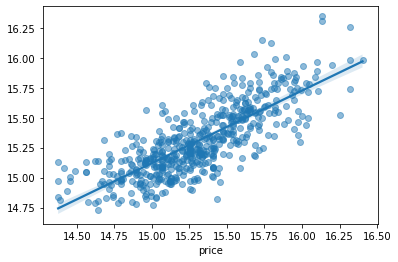

In [54]:
sns.regplot(x=y, y=model8.fittedvalues, scatter_kws={'alpha':0.5})